# Bagel Shop Predictive Analytics Project

### By Adam Meyer

# Summary

In this project, I imported a dataset to investigate the trends of bagel sales and determine the appropriate quantity of bagels to be made each day, including the distribution among different types (everything, plain, salt, cinnamon, and sesame). Several factors were considered, such as the sales volume of the previous day, temperature, date, holiday status, and weekend status. It's important to note that the dataset is synthetic and generated using a Python script to emulate observed trends. The aim is to provide insights into potential strategies for bagel shops based on accurate data collection and analysis. 

During my analysis of the bagel sales, I found several significant trends. Notably, over 36% of all bagels sold were Everything, followed by 24% Salt, and approximately 16-17% for Plain and Sesame, with Cinnamon accounting for 5%. Temperature exhibited a strong correlation with bagel sales, with coefficients of 0.72 for weekends and 0.70 for weekdays. Additionally, previous day's sales showed robust correlations, with coefficients of 0.74 for weekends and 0.72 for weekdays. Regarding predictive modeling, the best linear regression model, leveraging features such as temperature, previous day's sales, and weekend indicators, yielded an MSE of 638.18 and an R-squared (R2) score of 0.67. The top-performing KNN model, utilizing the same features, resulted in an MSE of 1067.89 and an R2 score of 0.51, while the best decision tree model achieved an MSE of 675.12 and an R2 score of 0.65. These findings underscore the significance of temperature, previous sales, and weekend patterns in accurately predicting bagel sales, providing valuable insights for business optimization.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Load CSV

In [2]:
csv_file_path = 'bagel_shop_data.csv'
df = pd.read_csv(csv_file_path, parse_dates=['date'])
df.head()

,date,bagels_sold,is_weekend,everything_bagels_sold,cinnamon_bagels_sold,sesame_bagels_sold,salt_bagels_sold,plain_bagels_sold,temperature_F,is_holiday
0,2022-01-01,113,1,34,6,29,33,11,20,1
1,2022-01-02,100,1,41,6,12,27,14,22,0
2,2022-01-03,64,0,19,5,2,16,22,12,0
3,2022-01-04,61,0,26,2,3,15,15,17,0
4,2022-01-05,51,0,17,1,17,13,3,17,0


# Investigation
### Bagel Sales Overall
Based on the chart below, sales have remained consistant over the year

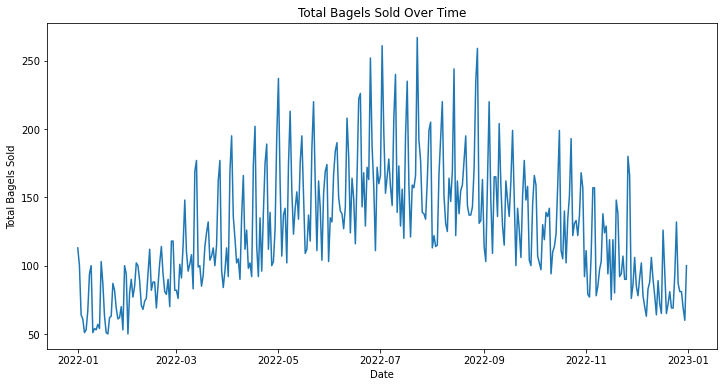

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='bagels_sold', data=df)
plt.title('Total Bagels Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bagels Sold')
plt.show()

## Looking at differences between weekend and weekday bagel sales

The chart below shows up that weekend tend to be way more busy than weekdays which means more bagels should be made. 

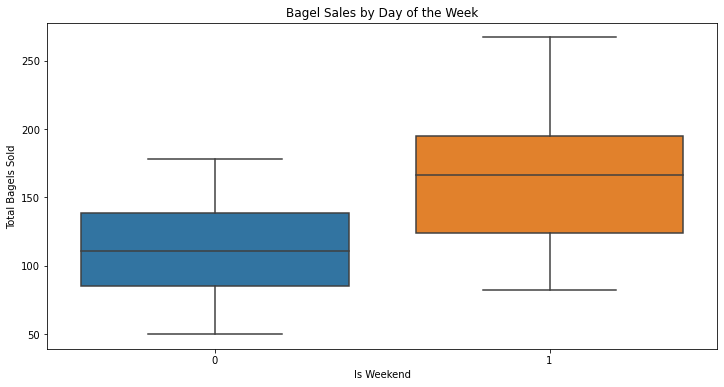

In [4]:
# Box plot of bagel sales by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_weekend', y='bagels_sold', data=df)
plt.title('Bagel Sales by Day of the Week')
plt.xlabel('Is Weekend')
plt.ylabel('Total Bagels Sold')
plt.show()


## Investigating the holidays vs non-holidays

Based on the boxplot below, holidays don't seem to change the number of bagels sold too much. And non-holidays have more variablity. 

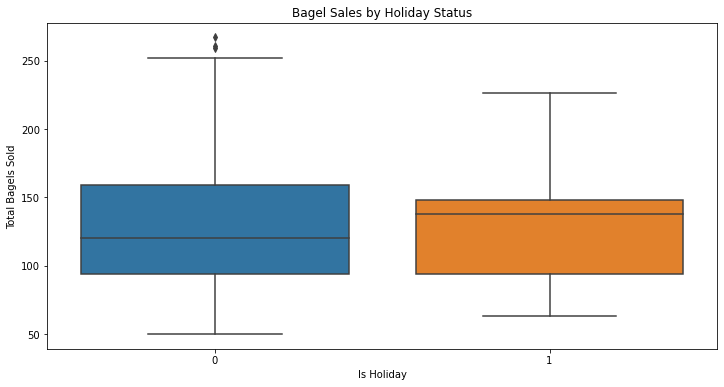

In [5]:
# Boxplot of bagel sales by holiday status
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_holiday', y='bagels_sold', data=df)
plt.title('Bagel Sales by Holiday Status')
plt.xlabel('Is Holiday')
plt.ylabel('Total Bagels Sold')
plt.show()

## Investigating Temperature

For the bagel shop, located in Nederland Colorado, seems to be very strong correlation between the number of bagels sold and temperatures for both weekends and weekdays.

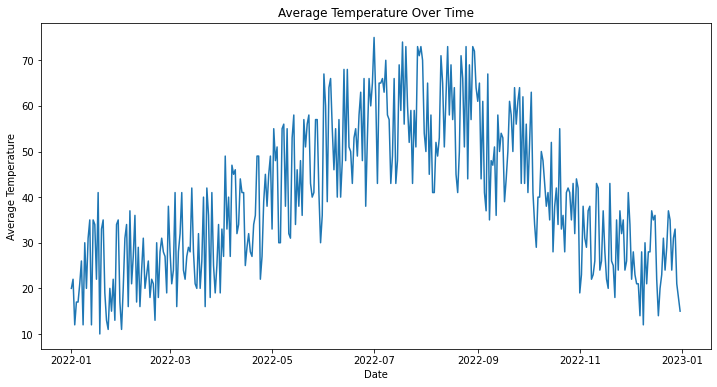

In [6]:
# Line plot of average temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='temperature_F', data=df)
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

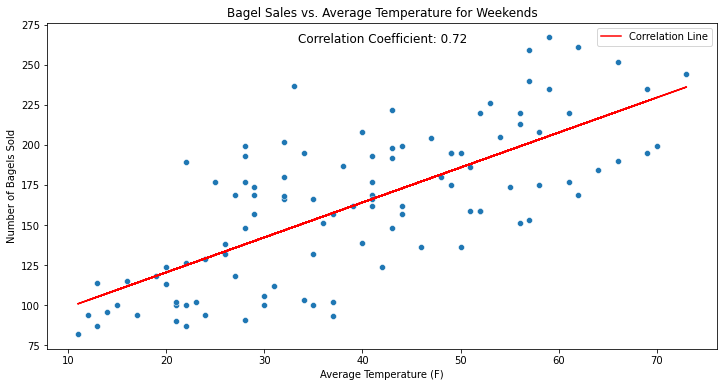

In [7]:
# Filter data to include only weekends
weekend_data = df[df['is_weekend'] == 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature_F', y='bagels_sold', data=weekend_data)
plt.title('Bagel Sales vs. Average Temperature for Weekends')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Number of Bagels Sold')

# Fit linear regression line
x_temp = np.array(weekend_data['temperature_F']).reshape(-1, 1)
y_bagels_sold = np.array(weekend_data['bagels_sold'])
model = LinearRegression().fit(x_temp, y_bagels_sold)
y_pred = model.predict(x_temp)
plt.plot(weekend_data['temperature_F'], y_pred, color='red', label='Correlation Line')

# Calculate correlation coefficient
corr_coefficient, _ = pearsonr(weekend_data['temperature_F'], weekend_data['bagels_sold'])
plt.text(0.5, 0.95, f'Correlation Coefficient: {corr_coefficient:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)


plt.legend()
plt.show()

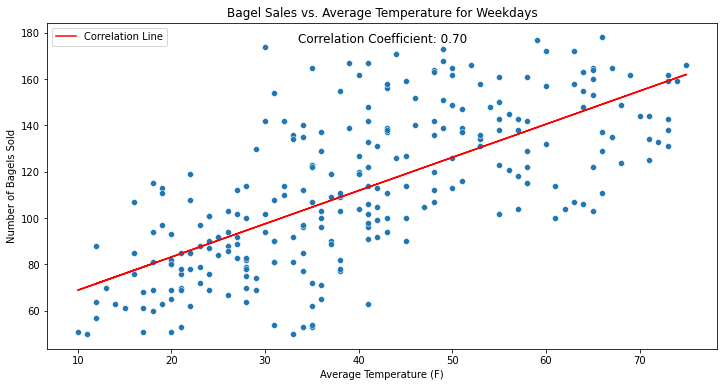

In [8]:
# Filter data to include only weekends
weekday_data = df[df['is_weekend'] == 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature_F', y='bagels_sold', data=weekday_data)
plt.title('Bagel Sales vs. Average Temperature for Weekdays')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Number of Bagels Sold')

# Fit linear regression line
x_temp = np.array(weekday_data['temperature_F']).reshape(-1, 1)
y_bagels_sold = np.array(weekday_data['bagels_sold'])
model = LinearRegression().fit(x_temp, y_bagels_sold)
y_pred = model.predict(x_temp)
plt.plot(weekday_data['temperature_F'], y_pred, color='red', label='Correlation Line')

# Calculate correlation coefficient
corr_coefficient, _ = pearsonr(weekday_data['temperature_F'], weekday_data['bagels_sold'])
plt.text(0.5, 0.95, f'Correlation Coefficient: {corr_coefficient:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)


plt.legend()
plt.show()

## Investigation of the types of bagels

The charts below show how the types of bagels relate to some variables. No type significantly increates sales based on the weekend or weekday or the temperature. But the results show the percentage of the bagels you make should be near 37% Everything, 24% for salt, 17% for plain, 17% sesame, and 5% for cinnamon.

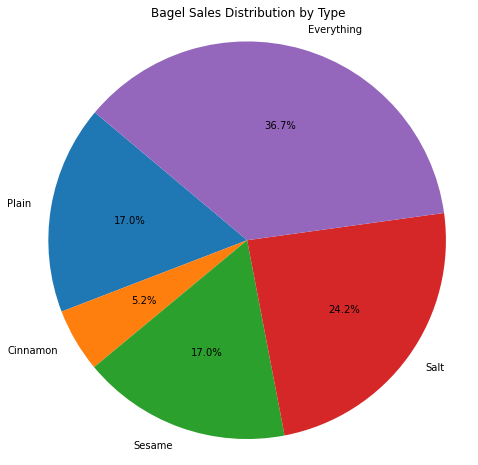

In [9]:
# Calculate total sales for each type of bagel
total_plain_sales = df['plain_bagels_sold'].sum()
total_cinnamon_sales = df['cinnamon_bagels_sold'].sum()
total_sesame_sales = df['sesame_bagels_sold'].sum()
total_salt_sales = df['salt_bagels_sold'].sum()
total_everything_sales = df['everything_bagels_sold'].sum()

# Create labels and sizes for the pie chart
labels = ['Plain', 'Cinnamon', 'Sesame', 'Salt', 'Everything']
sizes = [total_plain_sales, total_cinnamon_sales, total_sesame_sales, total_salt_sales, total_everything_sales]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Bagel Sales Distribution by Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show plot
plt.show()


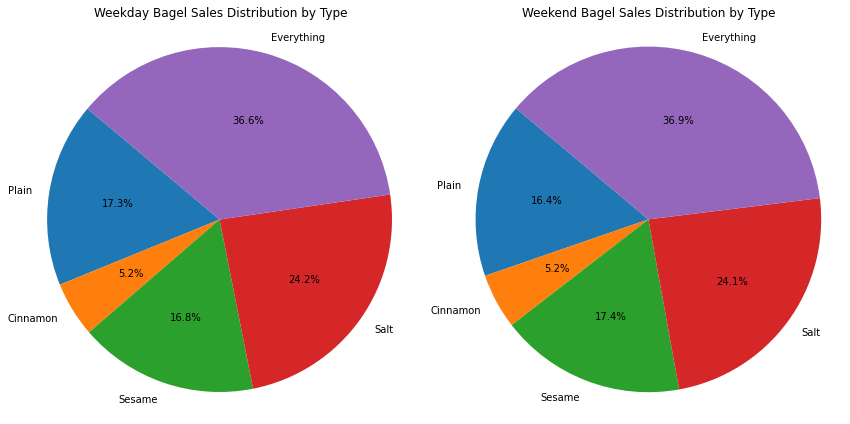

In [10]:
# Calculate total sales for each type of bagel for weekdays and weekends
total_plain_sales_weekday = weekday_data['plain_bagels_sold'].sum()
total_cinnamon_sales_weekday = weekday_data['cinnamon_bagels_sold'].sum()
total_sesame_sales_weekday = weekday_data['sesame_bagels_sold'].sum()
total_salt_sales_weekday = weekday_data['salt_bagels_sold'].sum()
total_everything_sales_weekday = weekday_data['everything_bagels_sold'].sum()

total_plain_sales_weekend = weekend_data['plain_bagels_sold'].sum()
total_cinnamon_sales_weekend = weekend_data['cinnamon_bagels_sold'].sum()
total_sesame_sales_weekend = weekend_data['sesame_bagels_sold'].sum()
total_salt_sales_weekend = weekend_data['salt_bagels_sold'].sum()
total_everything_sales_weekend = weekend_data['everything_bagels_sold'].sum()

# Create labels and sizes for the pie charts
labels = ['Plain', 'Cinnamon', 'Sesame', 'Salt', 'Everything']
sizes_weekday = [total_plain_sales_weekday, total_cinnamon_sales_weekday, total_sesame_sales_weekday, total_salt_sales_weekday, total_everything_sales_weekday]
sizes_weekend = [total_plain_sales_weekend, total_cinnamon_sales_weekend, total_sesame_sales_weekend, total_salt_sales_weekend, total_everything_sales_weekend]

# Create subplots for weekday and weekend pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create pie chart for weekdays
axes[0].pie(sizes_weekday, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Weekday Bagel Sales Distribution by Type')

# Create pie chart for weekends
axes[1].pie(sizes_weekend, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Weekend Bagel Sales Distribution by Type')

# Equal aspect ratio ensures that pie charts are drawn as circles
axes[0].axis('equal')
axes[1].axis('equal')

# Show plots
plt.tight_layout()
plt.show()

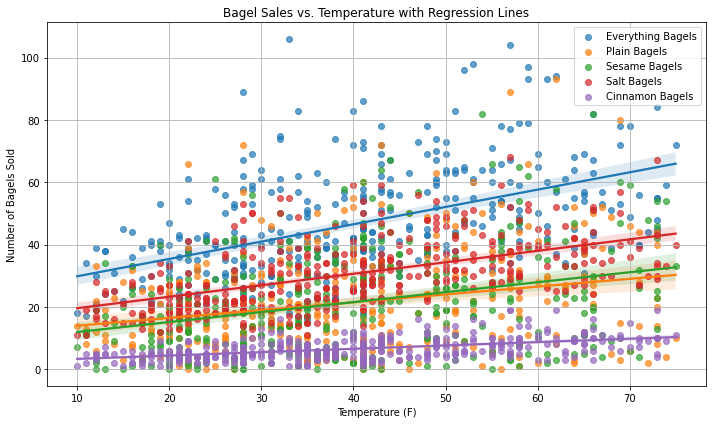

In [11]:
# Create scatter plot with regression lines
plt.figure(figsize=(10, 6))
sns.regplot(x='temperature_F', y='everything_bagels_sold', data=df, label='Everything Bagels', scatter_kws={'alpha':0.7})
sns.regplot(x='temperature_F', y='plain_bagels_sold', data=df, label='Plain Bagels', scatter_kws={'alpha':0.7})
sns.regplot(x='temperature_F', y='sesame_bagels_sold', data=df, label='Sesame Bagels', scatter_kws={'alpha':0.7})
sns.regplot(x='temperature_F', y='salt_bagels_sold', data=df, label='Salt Bagels', scatter_kws={'alpha':0.7})
sns.regplot(x='temperature_F', y='cinnamon_bagels_sold', data=df, label='Cinnamon Bagels', scatter_kws={'alpha':0.7})

# Customize plot
plt.title('Bagel Sales vs. Temperature with Regression Lines')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Bagels Sold')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Investigate the previous days bagels sales

In [12]:
# Shift the 'bagels_sold' column by one to get the previous day's sales
df['previous_day_bagels_sold'] = df['bagels_sold'].shift(1)
# Drop the first row since it will have NaN value for 'previous_day_bagels_sold'
df = df.dropna()

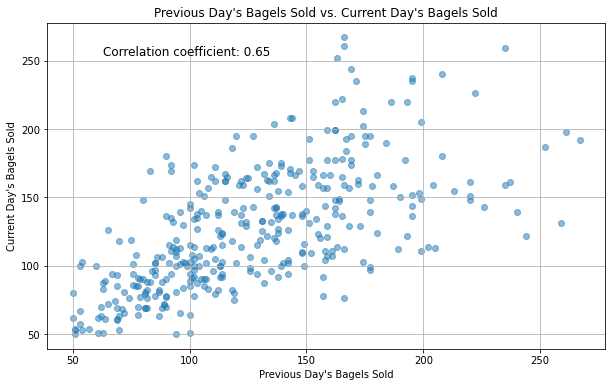

In [13]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['previous_day_bagels_sold'], df['bagels_sold'], alpha=0.5)
plt.title('Previous Day\'s Bagels Sold vs. Current Day\'s Bagels Sold')
plt.xlabel('Previous Day\'s Bagels Sold')
plt.ylabel('Current Day\'s Bagels Sold')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(df['previous_day_bagels_sold'], df['bagels_sold'])[0, 1]
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

#### Test for Just Weekends and just Weekdays

In [14]:
# Shift the 'bagels_sold' column by one to get the previous day's sales
weekday_data['previous_day_bagels_sold'] = weekday_data['bagels_sold'].shift(1)
# Drop the first row since it will have NaN value for 'previous_day_bagels_sold'
weekday_data = weekday_data.dropna()

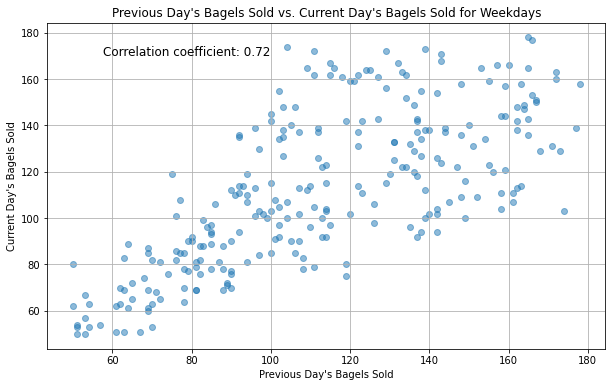

In [15]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weekday_data['previous_day_bagels_sold'], weekday_data['bagels_sold'], alpha=0.5)
plt.title('Previous Day\'s Bagels Sold vs. Current Day\'s Bagels Sold for Weekdays')
plt.xlabel('Previous Day\'s Bagels Sold')
plt.ylabel('Current Day\'s Bagels Sold')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(weekday_data['previous_day_bagels_sold'], weekday_data['bagels_sold'])[0, 1]
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [16]:
# Shift the 'bagels_sold' column by one to get the previous day's sales
weekend_data['previous_day_bagels_sold'] = weekend_data['bagels_sold'].shift(1)
# Drop the first row since it will have NaN value for 'previous_day_bagels_sold'
weekend_data = weekend_data.dropna()

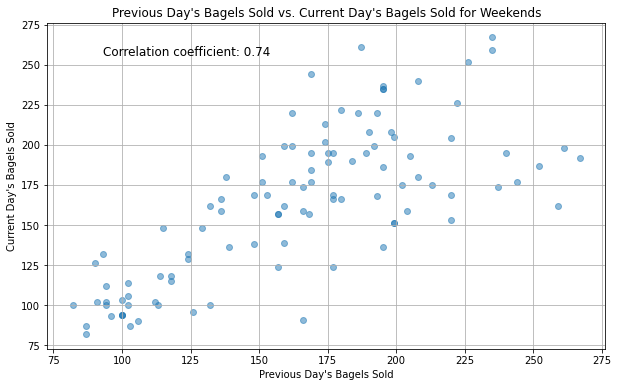

In [17]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weekend_data['previous_day_bagels_sold'], weekend_data['bagels_sold'], alpha=0.5)
plt.title('Previous Day\'s Bagels Sold vs. Current Day\'s Bagels Sold for Weekends')
plt.xlabel('Previous Day\'s Bagels Sold')
plt.ylabel('Current Day\'s Bagels Sold')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(weekend_data['previous_day_bagels_sold'], weekend_data['bagels_sold'])[0, 1]
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

Just using the previous days bagel sales has strong correlation when looking specifically at the sales from the day before.

## Predictive Modeling

### Linear Regression

In [18]:
# Select features and target variable
# features = ['temperature_F', 'is_weekend']  # Add other relevant features as needed
features = ['temperature_F', 'is_weekend', 'previous_day_bagels_sold'] 
# features = ['temperature_F', 'is_weekend', 'is_holiday', 'previous_day_bagels_sold'] 
# features = ['previous_day_bagels_sold'] 

X = df[features]
y = df['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

markdown_text = """
The Mean Squared Error (MSE) of the linear regression model is {:.2f}. The MSE represents the average squared difference between the actual and predicted values, with lower values indicating better fit.

The R-squared (R2) score of the linear regression model is {:.2f}. R2 is a measure of how well the independent variables explain the variability of the dependent variable. An R2 score closer to 1 indicates that the model explains a larger proportion of the variance in the target variable, while scores closer to 0 indicate poorer fit.
""".format(mse, r2)

print(markdown_text)


The Mean Squared Error (MSE) of the linear regression model is 638.18. The MSE represents the average squared difference between the actual and predicted values, with lower values indicating better fit.

The R-squared (R2) score of the linear regression model is 0.67. R2 is a measure of how well the independent variables explain the variability of the dependent variable. An R2 score closer to 1 indicates that the model explains a larger proportion of the variance in the target variable, while scores closer to 0 indicate poorer fit.



#### Predictions just using weekend data

In [19]:
# Select features and target variable
# features = ['temperature_F']
# features = ['temperature_F', 'is_holiday']
features = ['temperature_F', 'is_holiday','previous_day_bagels_sold']  # Add other relevant features as needed
# features = ['previous_day_bagels_sold'] 

X = weekend_data[features]
y = weekend_data['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
markdown_text = """
The Mean Squared Error (MSE) of the linear regression model with previous day's bagels sold is {:.2f}. The MSE represents the average squared difference between the actual and predicted values, with lower values indicating better fit.

The R-squared (R2) score of the linear regression model with previous day's bagels sold is {:.2f}. R2 is a measure of how well the independent variables explain the variability of the dependent variable. An R2 score closer to 1 indicates that the model explains a larger proportion of the variance in the target variable, while scores closer to 0 indicate poorer fit.
""".format(mse, r2)

print(markdown_text)


The Mean Squared Error (MSE) of the linear regression model with previous day's bagels sold is 784.18. The MSE represents the average squared difference between the actual and predicted values, with lower values indicating better fit.

The R-squared (R2) score of the linear regression model with previous day's bagels sold is 0.64. R2 is a measure of how well the independent variables explain the variability of the dependent variable. An R2 score closer to 1 indicates that the model explains a larger proportion of the variance in the target variable, while scores closer to 0 indicate poorer fit.



#### Predictions just using weekday data

In [20]:
# Select features and target variable
# features = ['temperature_F']
# features = ['temperature_F', 'is_holiday']
features = ['temperature_F', 'is_holiday', 'previous_day_bagels_sold']  # Add other relevant features as needed
# features = ['previous_day_bagels_sold'] 

X = weekend_data[features]
y = weekend_data['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
markdown_text = """
The Mean Squared Error (MSE) of the linear regression model with previous day's bagels sold is {:.2f}. The MSE represents the average squared difference between the actual and predicted values, with lower values indicating better fit.

The R-squared (R2) score of the linear regression model with previous day's bagels sold is {:.2f}. R2 is a measure of how well the independent variables explain the variability of the dependent variable. An R2 score closer to 1 indicates that the model explains a larger proportion of the variance in the target variable, while scores closer to 0 indicate poorer fit.
""".format(mse, r2)

print(markdown_text)


The Mean Squared Error (MSE) of the linear regression model with previous day's bagels sold is 784.18. The MSE represents the average squared difference between the actual and predicted values, with lower values indicating better fit.

The R-squared (R2) score of the linear regression model with previous day's bagels sold is 0.64. R2 is a measure of how well the independent variables explain the variability of the dependent variable. An R2 score closer to 1 indicates that the model explains a larger proportion of the variance in the target variable, while scores closer to 0 indicate poorer fit.



##### The best linear regression model was found when using the full dataset and using the features; temperature, the previous days sales, and if it is a weekend or not. This resulted in an MSE of 638.18 and a R-squared (R2) score of  0.67.

### Decision Trees

Mean Squared Error (MSE): 675.12
R-squared (R2) Score: 0.65


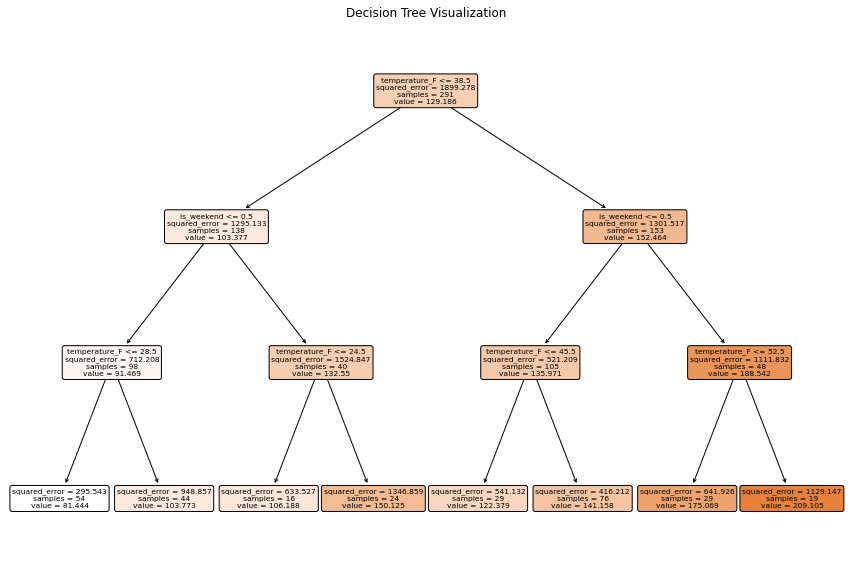

In [21]:
# Select features and target variable
features = ['temperature_F', 'is_weekend', 'is_holiday']  # Add other relevant features as needed
X = df[features]
y = df['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree model
model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MSE and R2 scores
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

#### Just Weekend Data

Mean Squared Error (MSE): 1173.55
R-squared (R2) Score: 0.46


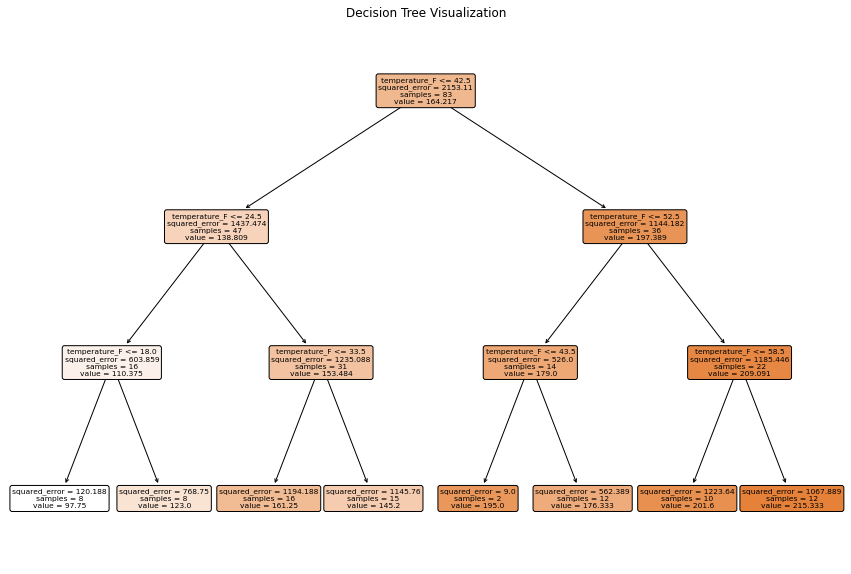

In [22]:
# Select features and target variable
features = ['temperature_F', 'is_holiday']  # Add other relevant features as needed
X = weekend_data[features]
y = weekend_data['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree model
model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MSE and R2 scores
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

#### Just Weekday Data

Mean Squared Error (MSE): 955.87
R-squared (R2) Score: 0.32


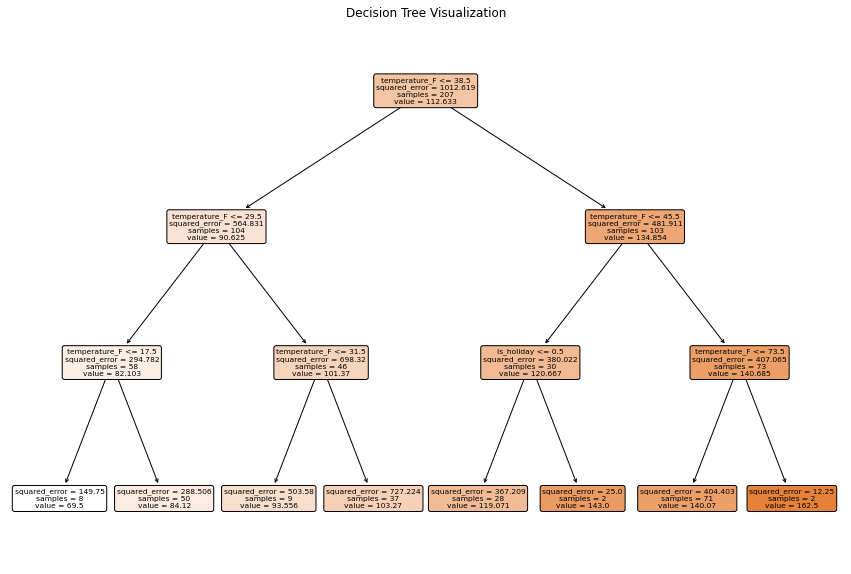

In [23]:
# Select features and target variable
features = ['temperature_F', 'is_holiday']  # Add other relevant features as needed
X = weekday_data[features]
y = weekday_data['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree model
model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MSE and R2 scores
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

##### The best decision tree model was found when using the full dataset and using the features; temperature, the previous days sales, and if it is a weekend or not. This resulted in an MSE of 675.12 and a R-squared (R2) score of  0.65.

### K-Nearest Neighbors

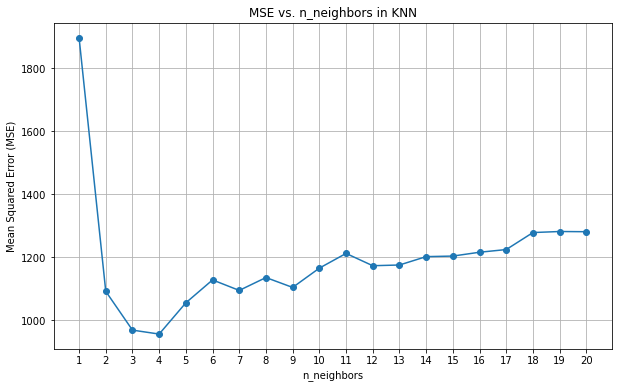

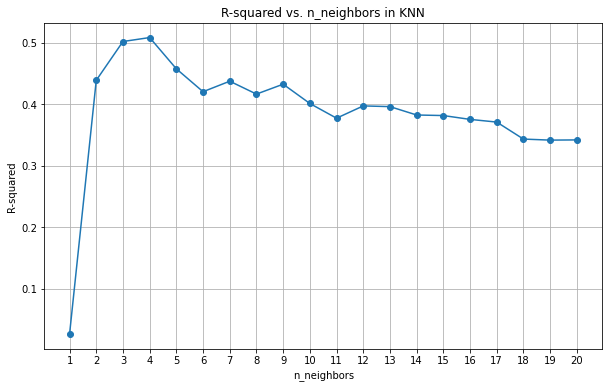

The best R2 value is 0.5088372987687684 and the corresponding MSE is 956.8835616438356


In [24]:
# Select features and target variable
features = ['temperature_F', 'is_weekend', 'is_holiday']  # Add other relevant features as needed
X = df[features]
y = df['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_neighbors values to test
n_neighbors_values = range(1, 21)  # Test from 1 to 20 neighbors

# Initialize lists to store MSE and R2 values
mse_values = []
r2_values = []

# Iterate over different values of n_neighbors
for n in n_neighbors_values:
    # Initialize and fit the KNN regressor model
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # Calculate R2 and append to the list
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# Create line chart for MSE
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. n_neighbors in KNN')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(n_neighbors_values)
plt.show()

# Create line chart for R-squared
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, r2_values, marker='o', linestyle='-')
plt.title('R-squared vs. n_neighbors in KNN')
plt.xlabel('n_neighbors')
plt.ylabel('R-squared')
plt.grid(True)
plt.xticks(n_neighbors_values)
plt.show()

# Find the index of the maximum R2 value
max_r2_index = r2_values.index(max(r2_values))

# Print the best R2 value and its corresponding MSE value
print("The best R2 value is", max(r2_values), "and the corresponding MSE is", mse_values[max_r2_index])


The best KNN model is when n is set to 4 but still this is not a great model since the MSE is very high and the R2 is not that close to 1.

#### Just Weekend KNN

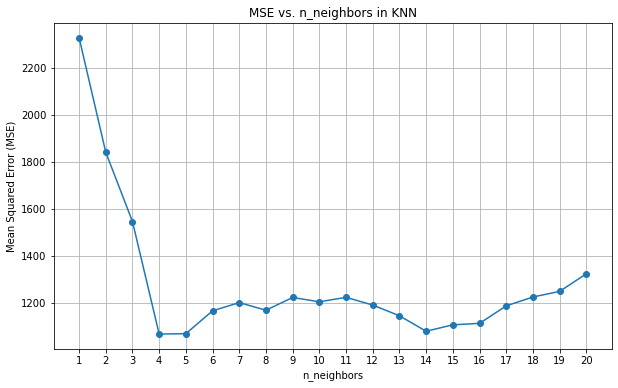

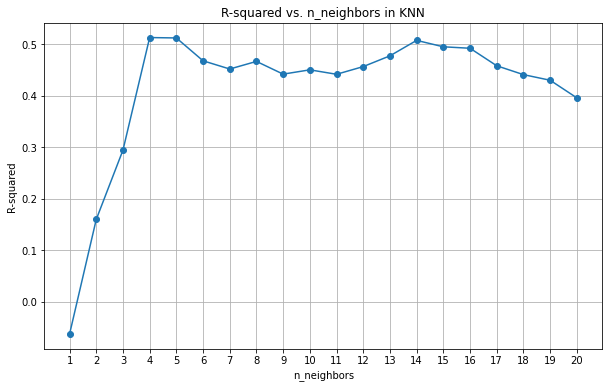

The best R2 value is 0.5127160854377532 and the corresponding MSE is 1067.889880952381


In [25]:
# Select features and target variable
features = ['temperature_F', 'is_holiday']  # Add other relevant features as needed
X = weekend_data[features]
y = weekend_data['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_neighbors values to test
n_neighbors_values = range(1, 21)  # Test from 1 to 20 neighbors

# Initialize lists to store MSE and R2 values
mse_values = []
r2_values = []

# Iterate over different values of n_neighbors
for n in n_neighbors_values:
    # Initialize and fit the KNN regressor model
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # Calculate R2 and append to the list
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# Create line chart for MSE
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. n_neighbors in KNN')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(n_neighbors_values)
plt.show()

# Create line chart for R-squared
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, r2_values, marker='o', linestyle='-')
plt.title('R-squared vs. n_neighbors in KNN')
plt.xlabel('n_neighbors')
plt.ylabel('R-squared')
plt.grid(True)
plt.xticks(n_neighbors_values)
plt.show()

# Find the index of the maximum R2 value
max_r2_index = r2_values.index(max(r2_values))

# Print the best R2 value and its corresponding MSE value
print("The best R2 value is", max(r2_values), "and the corresponding MSE is", mse_values[max_r2_index])


#### Just Weekdays KNN

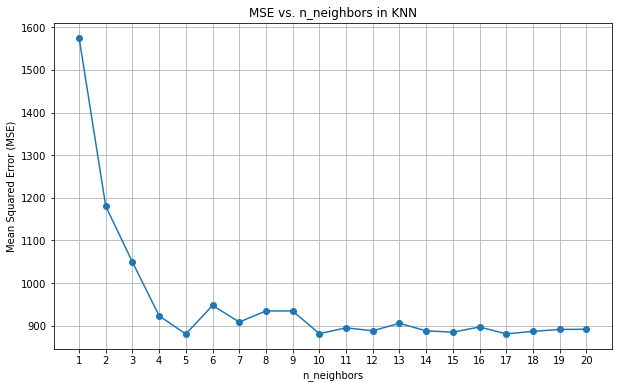

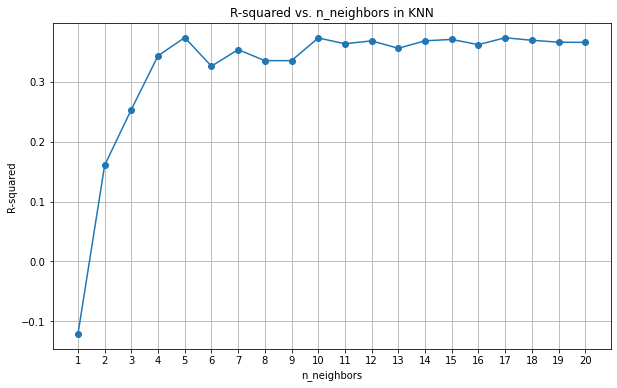

The best R2 value is 0.3735835748423667 and the corresponding MSE is 880.4938461538463


In [26]:
# Select features and target variable
features = ['temperature_F', 'is_holiday']  # Add other relevant features as needed
X = weekday_data[features]
y = weekday_data['bagels_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_neighbors values to test
n_neighbors_values = range(1, 21)  # Test from 1 to 20 neighbors

# Initialize lists to store MSE and R2 values
mse_values = []
r2_values = []

# Iterate over different values of n_neighbors
for n in n_neighbors_values:
    # Initialize and fit the KNN regressor model
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate MSE and append to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # Calculate R2 and append to the list
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# Create line chart for MSE
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. n_neighbors in KNN')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(n_neighbors_values)
plt.show()

# Create line chart for R-squared
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, r2_values, marker='o', linestyle='-')
plt.title('R-squared vs. n_neighbors in KNN')
plt.xlabel('n_neighbors')
plt.ylabel('R-squared')
plt.grid(True)
plt.xticks(n_neighbors_values)
plt.show()

# Find the index of the maximum R2 value
max_r2_index = r2_values.index(max(r2_values))

# Print the best R2 value and its corresponding MSE value
print("The best R2 value is", max(r2_values), "and the corresponding MSE is", mse_values[max_r2_index])


##### The best KNN model was found when using the full dataset and using the features; temperature, the previous days sales, and if it is a weekend or not. This resulted in an MSE of 1067.89 and a R-squared (R2) score of  0.51.

## Results Summary

During my analysis of the bagel sales, I found several significant trends. Notably, over 36% of all bagels sold were Everything, followed by 24% Salt, and approximately 16-17% for Plain and Sesame, with Cinnamon accounting for 5%. Temperature exhibited a strong correlation with bagel sales, with coefficients of 0.72 for weekends and 0.70 for weekdays. Additionally, previous day's sales showed robust correlations, with coefficients of 0.74 for weekends and 0.72 for weekdays. Regarding predictive modeling, the best linear regression model, leveraging features such as temperature, previous day's sales, and weekend indicators, yielded an MSE of 638.18 and an R-squared (R2) score of 0.67. The top-performing KNN model, utilizing the same features, resulted in an MSE of 1067.89 and an R2 score of 0.51, while the best decision tree model achieved an MSE of 675.12 and an R2 score of 0.65. These findings underscore the significance of temperature, previous sales, and weekend patterns in accurately predicting bagel sales, providing valuable insights for business optimization.